### Temat 2

### Projekt zaliczeniowy Ireneusz Kurzak

Przewidywanie wzięcia pożyczki. Celem projektu jest zastosowanie modeli klasyfikacji (binarnej) do przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku.
Link do danych: https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv
| Sages Sp. z o. o. | Nowogrodzka 62 C | 02-002 Warszawa | www.sages.com.pl | biuro@sages.com.pl | 48 22 203 56 00 |
4

Opis danych (najdokładniejszy jaki istnieje): https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802
Zmienna celu (wypłacenie pożyczki): Disbursed

Wymogi:

    ● Zmienna LoggedIn nie może być uwzględniona w modelowaniu - należy ją od razu wyrzucić ze zbioru.
    
    ● Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.
    
    ● Wszelkie nieoczywiste przekształcenia danych należy opatrzyć uzasadnieniem dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięci logarytmu ze zmiennej tym, że rozkład jest skośny).
    
    ● Należy wykorzystać przynajmniej 3 metody klasyfikacji.
    
    ● Należy uwzględnić optymalizację modeli/pipelinów.
    
    ● Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań (modeli/pipelinów) w postaci tabeli, gdzie jeden wiersz opisuje jedno rozwiązanie i jego wynik.
    

In [251]:
#import bibliotek, które będą używane w projekcie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC




In [252]:
# Wczytanie zbioru danych, na podstawie którego będzie przygotowywany model
data = pd.read_csv("C:\\Users\\vv83cy\\Projects\\Anaconda\\Train.csv", encoding='latin-1')

In [253]:
data.head()
#data.head()
#data.info()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [254]:
data.shape

(87020, 26)

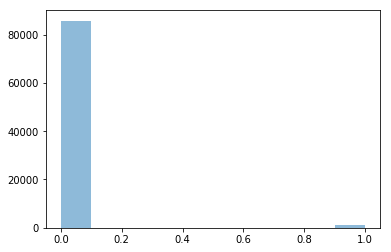

In [255]:
plt.hist(data["Disbursed"], alpha = 0.5)
plt.show()

#### Mamy bardzo mały odsetek klientów, którzy otrzymali kredyt co sprawia, że mamy bardzo dużą dysproporcję (0) i (1)
#### Niektóre medory lubią jak jest 50/50
#### Zobaczymy jak nam pójdzie

#### W zbiorze, na którym będziemy przeprowadzać modelowanie mamy 87020 obserwacji oraz 26zmiennych

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [257]:
#spojrzenie czym na pierwszy rzut oka charakteryzują się klienci, którzy otrzymali kredyt
data_disbursed_only = data.loc[data['Disbursed'] > 0]

In [258]:
data_disbursed_only.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,LoggedIn,Disbursed
count,1273.000000,1.271000e+03,1271.000000,1271.000000,1273.000000,1.044000e+03,1044.000000,591.000000,584.000000,591.000000,1273.000000,1273.000000,1273.0
mean,62756.393559,3.257711e+05,2.745083,8802.069237,10.413197,4.882471e+05,3.878352,15.544349,6195.623288,13503.433976,3.461115,0.975648,1.0
std,72760.322005,3.598040e+05,1.968933,16342.322356,5.520876,3.515727e+05,1.183763,2.846414,5814.643788,8839.718569,1.383394,0.154200,0.0
min,15000.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000e+04,1.000000,11.990000,250.000000,1832.800000,0.000000,0.000000,1.0
25%,35000.000000,1.000000e+05,0.000000,0.000000,7.000000,2.000000e+05,3.000000,13.990000,2000.000000,7172.365000,3.000000,1.000000,1.0
50%,48000.000000,2.000000e+05,3.000000,0.000000,12.000000,4.000000e+05,4.000000,14.850000,4125.000000,11291.070000,3.000000,1.000000,1.0
75%,70000.000000,5.000000e+05,5.000000,12000.000000,15.000000,6.300000e+05,5.000000,15.500000,8025.000000,17933.445000,5.000000,1.000000,1.0
max,1000000.000000,3.000000e+06,5.000000,300000.000000,18.000000,2.500000e+06,5.000000,35.500000,50000.000000,59803.400000,7.000000,1.000000,1.0


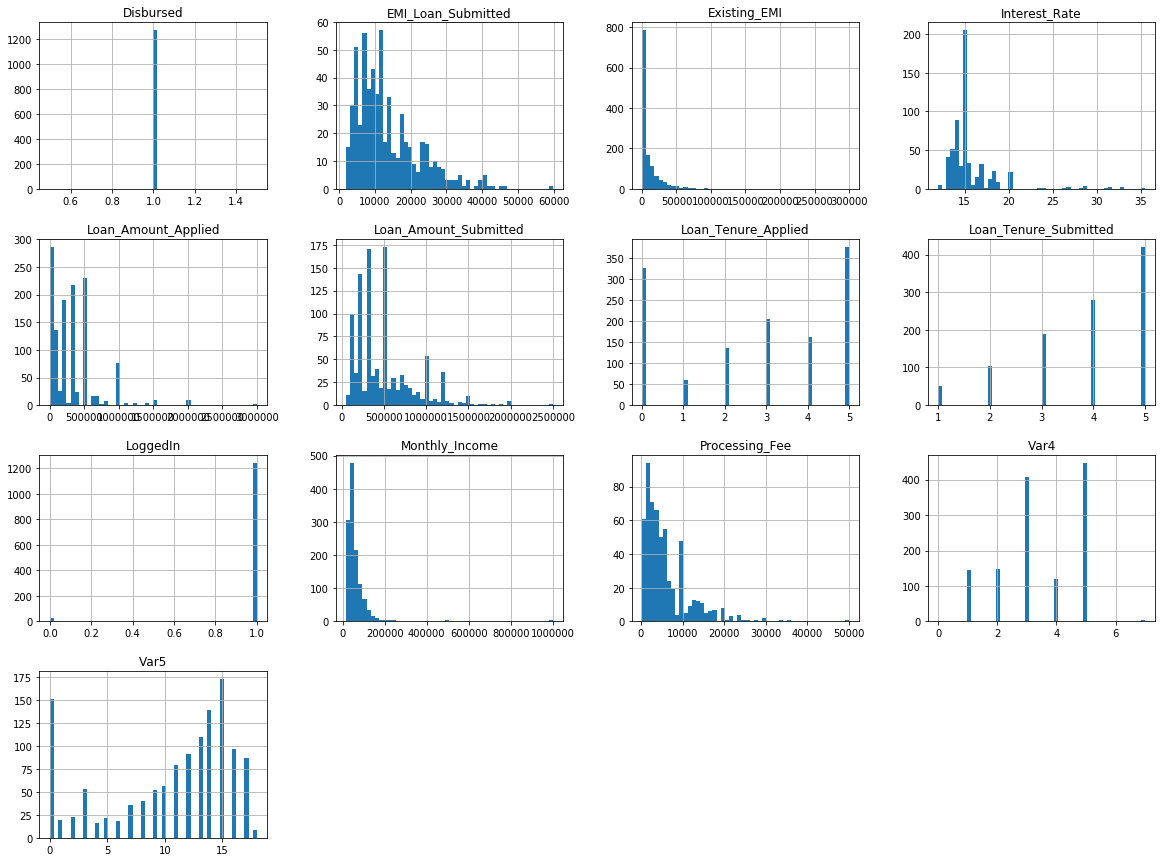

In [259]:
data_disbursed_only.hist(bins=50, figsize=(20,15))
plt.show()

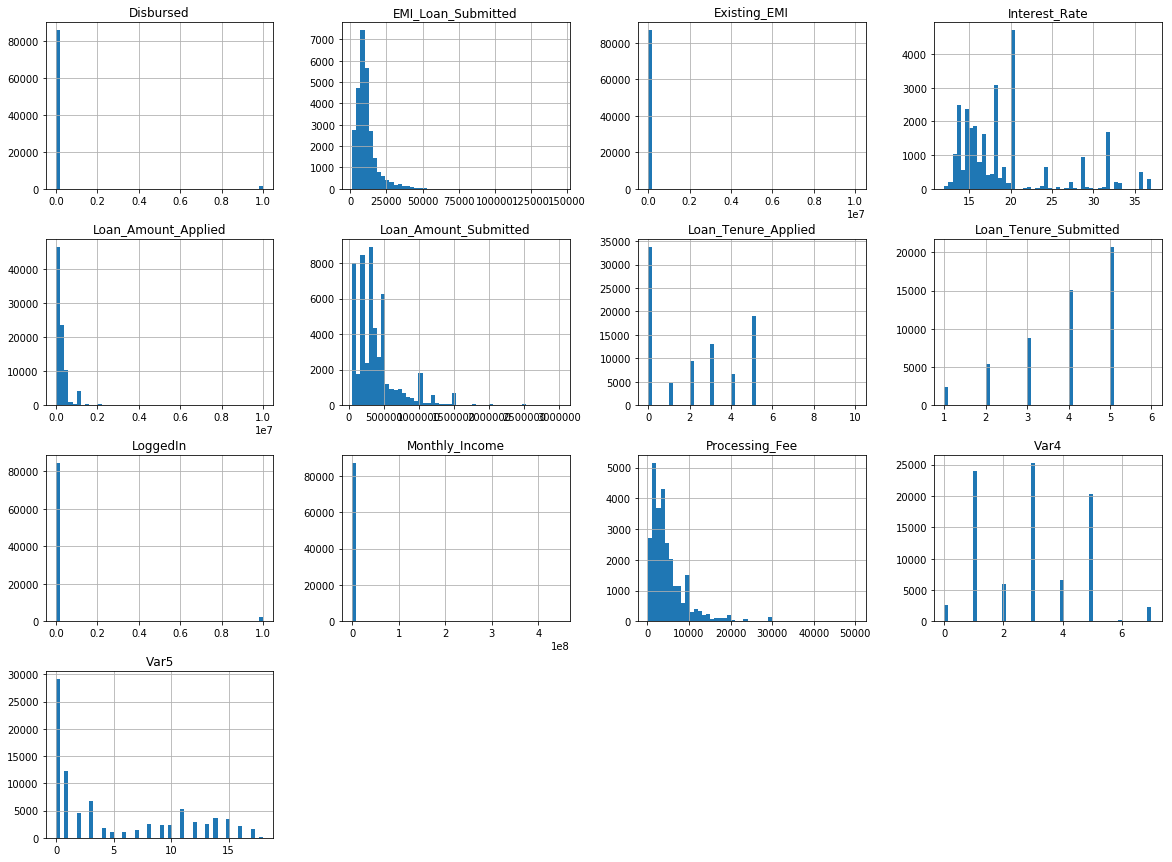

In [260]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [261]:
#print("")
#data_2 = data.drop(["Var1"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 26 columns):
ID                       87020 non-null object
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null 

In [262]:
#zamienie zmienna kategoryczne na dummy viariables dla tych, gdzie wartości nie jest zbyt wiele np. Gender
#metoda ta zwie się One – Hot – Encoding

data = pd.get_dummies(data,columns = ['Gender'] , drop_first=True);

#dla pozostałych zmiennych katerorycznych dokonam kodowania kategorii metodą Label Encoding
cat_data = ['ID', 'City','Employer_Name', 'Salary_Account','Mobile_Verified','Var2', 'Device_Type', 'Var1', 'Source', 'Filled_Form', 'Lead_Creation_Date', 'DOB' ]


for col in cat_data:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes
    #data = data.drop(col, axis=1)
    #data = data.join(tmp)



In [263]:
data["Employer_Name"].value_counts() 

#tutaj się zastanawiam nad tym czy jak zamienię wartości dla zmiennych kategorycznych na kody to potem przy usupełnianiu
#wartości pustych będziemy mieć: albo jakiś kod dla wartości pustej albo ta pusta wartość zostanie zastopiona średnia z wartości
#bezwzględnej kodów kategorii

98       4914
38690     550
7977      404
759       324
13845     301
15053     250
16218     239
16802     191
17199     181
13262     179
16163     173
16818     171
40269     162
42863     155
15086     148
16470     142
36949     134
16913     130
16894     128
3448      126
42849     116
27085     115
38917     113
8272      113
34129     108
16166     104
8155       99
30826      96
6774       96
1026       95
         ... 
26283       1
30377       1
1703        1
3750        1
5797        1
7844        1
16032       1
34423       1
36470       1
38517       1
42611       1
40628       1
38581       1
36534       1
22253       1
10019       1
34551       1
36598       1
38645       1
40692       1
18159       1
24300       1
16096       1
30441       1
32488       1
1767        1
3814        1
9955        1
12002       1
0           1
Name: Employer_Name, Length: 43568, dtype: int64

In [264]:
#data.head()
data.shape

(87020, 26)

In [265]:
# uzupełnianie braków danych bez usuwania obserwacji ze zbioru uczacego

column_names = data.columns.tolist()
columns_with_NaN = []
for col in column_names:
    if  data[col].isnull().sum()> 0 :
        columns_with_NaN.append(col)
        print(col )
columns_with_NaN   
#zmienne, opisujące parametry kredytów dla sytuacji nie udzielenia kredytu zawierają nulle
#nie mozemy usunąć tych wierszy gdyż stanowią zbyt duży odsetek próby --> po drugie ( albo po pierwsze ) to wszystkie obserwacje dla Disbursed = 0


#wartości puste NaN w kolumnach z listy columns_with_NaN zostają uzupełnione wartością średnią danej cechy dla analizowanej próby danych
for col in columns_with_NaN:
        col_avg = data[col].mean()
        data[col] = data[col].replace(np.NaN, col_avg)
      
 # todo: do zastanowienia czy nie jest logiczniej wstawić wszędzie zera, co bardziej pasuje do sytuacji nieudzielenia kredytu


Loan_Amount_Applied
Loan_Tenure_Applied
Existing_EMI
Loan_Amount_Submitted
Loan_Tenure_Submitted
Interest_Rate
Processing_Fee
EMI_Loan_Submitted


In [266]:
#data.head()
data.shape

(87020, 26)

In [267]:
#musze robić na próbce bo komp nie daje rady
# z defaultu nie wyrzucam rzadnych danych 

data_sample = data.sample(n=8000)
data_sample.shape

(8000, 26)

In [268]:
#podział na próbki: uczącą, walidującą i testową

#ze względu na to, że Regresja Logistyczna przyjmuje na we tylko zmienne numeryczne wszystkie zmienne kategoryczne ze zbioru data zostały przekształcone na liczbowe

X = data_sample.drop(["LoggedIn", "Disbursed"], axis=1) 
#X = data_sample[["Loan_Amount_Applied", "Salary_Account"]]
y = data_sample["Disbursed"] 


In [269]:
#y
print("")
#X

In [270]:
#?train_test_split

In [271]:
# ?train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

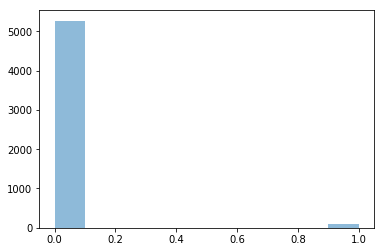

In [272]:
plt.hist(y_train, alpha = 0.5)
plt.show()

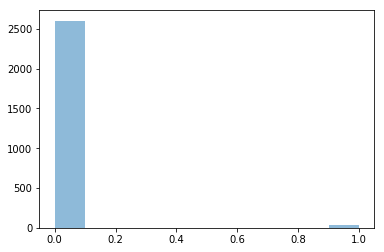

In [273]:
plt.hist(y_test, alpha = 0.5)
plt.show()

### Uczę pierwszy model ( regresja logistyczna )

In [274]:
#trzeba wyrzucić wszystkie dane tekstowe, kategoryczne bo regresja logistyczna tego nie lubi :-(
#dokonałem tego:
    #a) 
model_LogReg = LogisticRegression()
model_LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Ocena dopasowania

In [275]:
y_pred = model_LogReg.predict(X_test)

In [276]:
from sklearn.metrics import accuracy_score

In [277]:
accuracy_score(y_pred, y_test)

0.9859848484848485

#### Dla regresji logistycznej określam poziom dopasowania metodą kroswalidacji

In [278]:
scores = cross_val_score(model_LogReg, X, y, cv=5) #zmieniam liczbę fałd z domyślnej na 5

In [279]:
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.98376015 0.98375    0.98375    0.98375    0.98373984]


#### Tworzenie modelu metodą SVM

In [280]:
seed = 123
kfold = StratifiedKFold(n_splits=5, random_state = seed)

In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [282]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#param_grid = {'C': [0.001, 0.1, 10],
#              'gamma': [0.001, 0.1, 10]}

grid_1 = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'C': 0.001, 'gamma': 0.001}

#### Teraz jeszcze trzeba nauczyć model ( stworzyć i wytrenować ) przy optymalnej wartości parametrów C i gamma
#### ( jakbyśmy chcieli np. operacyjnie klasyfikować na podstawie wyniku działania obiektu tego modelu

#### Teraz tworzę jeszcze raz model metodą SVM ale na danych wyskalowanych i zoptymalizowanymi parametrami C oraz gamma
#### ( robię to tylko na zbiorze train !!!)

In [283]:
from sklearn.svm import SVC

svm = SVC(C=0.001, gamma = 0.001)

# przetworzenie danych wejściowych metodą  0-1 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# uczenie SVM na danych wystandaryzowanych
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("Scaled test set accuracy: {:.8f}".format( svm.score(X_test_scaled, y_test)))


# dla moich danych nie wnosi to zbyt wiele

Scaled test set accuracy: 0.98598485


#### Teraz zrobię pipeline z GridSerchem dla trzech metod klasyfikacji: regresji logistycznej, SVM oraz lasów losowych

In [284]:
seed = 123
kfold = StratifiedKFold(n_splits=5, random_state = seed)

#### Pipeline dla regresji logistycznej

In [285]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}


grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [286]:
print("Best x-validation accurancy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best x-validation accurancy: 0.98
Test set score: 0.99
Best parameters: {'logisticregression__C': 0.01}


#### Pipeline dla SVM

In [287]:
seed = 123
kfold = StratifiedKFold(n_splits=5, random_state = seed)

pipe_1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe_1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'preprocessing': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [288]:
print("Best x-validation accurancy: {:.2f}".format(grid_1.best_score_))
print("Test set score: {:.2f}".format(grid_1.score(X_test, y_test)))
print("Best parameters: {}".format(grid_1.best_params_))

Best x-validation accurancy: 0.98
Test set score: 0.99
Best parameters: {'classifier__C': 0.001, 'classifier__gamma': 0.001, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


#### Pipeline dla RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=100))])

param_grid_2 = [ {'classifier': [RandomForestClassifier(n_estimators=100)],
                                       'preprocessing': [None], 
                                       'classifier__max_features': [1, 2]} #dla pelnego zbioru biore 3
             ]



grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=5)
grid_2.fit(X_train, y_train)

In [ ]:
print("Best x-validation accurancy: {:.2f}".format(grid_2.best_score_))
print("Test set score: {:.2f}".format(grid_2.score(X_test, y_test)))
print("Best parameters: {}".format(grid_2.best_params_))

In [ ]:
model = grid_1.best_estimator_
print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))

In [ ]:
print "Sprawność: %f" %clf.score(test, test_targets)
print "Błąd: %f" %(1-clf.score(test, test_targets))
print "F1: ", f1_score(test_targets, test_labels, average=None)
print "F_0.5: ", fbeta_score(test_targets, test_labels,
                             average=None, beta=0.5)

In [ ]:
from sklearn import  metrics


models = []
models.append(('logisticregression__C 0.01', grid.best_estimator_))
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('RAndomForest', grid_2.best_estimator_))


precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

In [ ]:
d = [   ['1',precision_score[0], recall_score[0], f1_score[0], accuracy_score[0]],
          ['2',precision_score[1], recall_score[1], f1_score[1],accuracy_score[1]],
          ['3',precision_score[2], recall_score[2], f1_score[2],accuracy_score[2]]
    ]
df = pd.DataFrame(d,columns=['Method','precision_score', 'recall_score', 'f1_score', 'accuracy_score'])
df.set_index('Method', inplace=True)
df

In [ ]:
print("")

In [ ]:
print("")